---



# <font color='#ECA702'>**Análisis Multimodal de Síntomas en la Enfermedad de Parkinson**</font>

In [ ]:
#@title **Importar librerías**

# Manipulación de datos
import os
import cv2
import numpy as np
import librosa
import pandas as pd
from zipfile import ZipFile

# Pytorch essentials
import torch

# Utils
import matplotlib.pyplot as plt
from tqdm import tqdm

#Para Análisis de componentes principales
from sklearn.decomposition import PCA

In [ ]:
#@title **Cargamos los datos desde Drive**



from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/data_parkinson')
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1XRruCPRodR4OhRCRZYKsyODqa_GuBkfC/data_parkinson


In [ ]:
#@title **Extraer el zip**

os.mkdir('../../../../data')
os.popen('cp data.csv ../../../../data/data.csv')
target_path = os.path.join('../../../../data') # Aquí es donde van a quedar los datos
# deben quedar fuera de drive para poder acceder a ellos 'localmente'

# Unzip the downloaded files
zip_file_path = os.path.join('AudioVisualData_v7.zip')
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_path)

# # Me muevo hasta donde quedaron los datos
%cd ../../../../data
# Verifico
%ls

# <font color='#4C5FDA'> **Reducción de la dimensionalidad**</font>

<font color='#52F17F'>**PCA (Principal Component Analysis)**</font>: PCA es una técnica de reducción de dimensionalidad que transforma las características de los frames en un nuevo espacio de características, reduciendo la dimensión mientras conserva la información más significativa.

En un problema multiclase haría algo así:

<center>
  <img src="https://www.askpython.com/wp-content/uploads/2020/10/Visualizing-digits-data-in-2-dimensions-2-1024x512.jpeg.webp" width="600" height="400">
</center>

En el cual las clases iniciales eran las siguientes:

<center>
  <img src="https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset-1024x768.png" width="600" height="400">
</center>

https://www.kaggle.com/code/tilii7/dimensionality-reduction-pca-tsne - PCA y tSNE

https://www.askpython.com/python/examples/principal-component-analysis-for-image-data - PCA

https://www.kaggle.com/code/arthurtok/interactive-intro-to-dimensionality-reduction - PCA y tSNE

<ipython-input-4-6ac162fdd81b>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


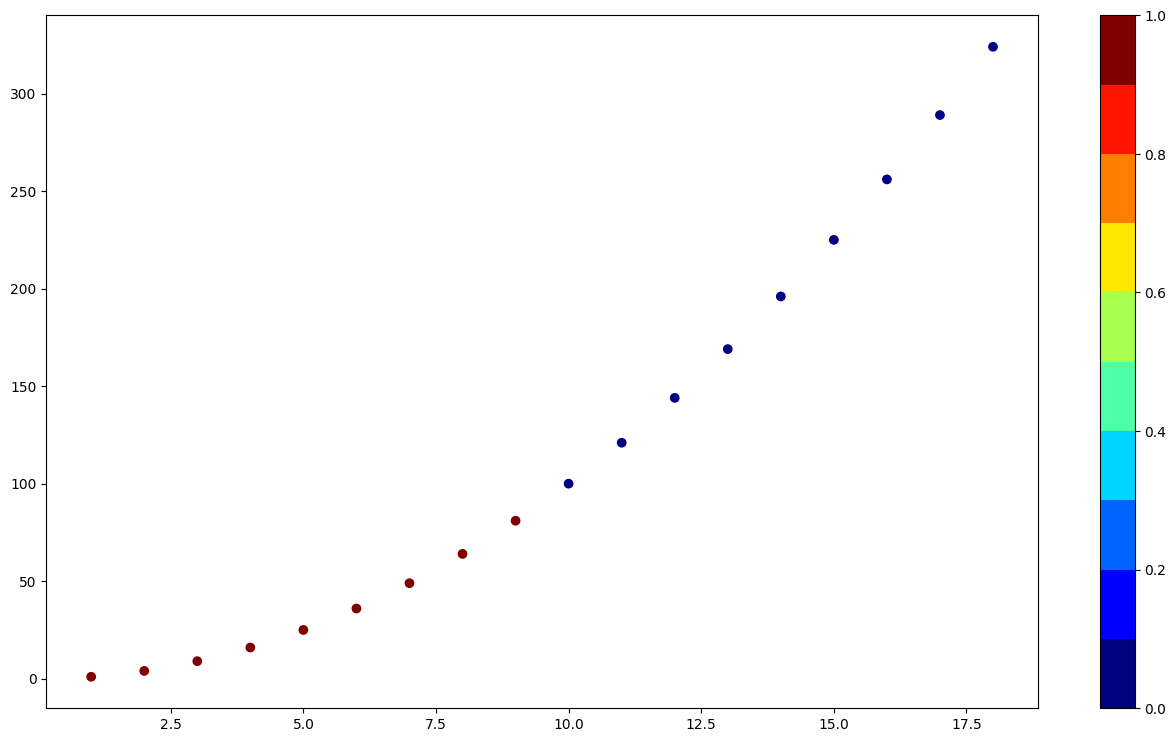

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
y = np.power(x, 2)
z =  np.ones(9).tolist()
z = z + np.zeros(9).tolist()

plt.figure( figsize= (16, 9) )
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter( x = x, y = y , cmap = c_map, c = z )
plt.colorbar()

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

# Cargar el dataset de MNIST
mnist = fetch_openml('mnist_784', version=1)

# Separar las características (X) y las etiquetas (y)
X, y = mnist["data"], mnist["target"]

# Convertir las etiquetas a enteros
y = y.astype(np.int8)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


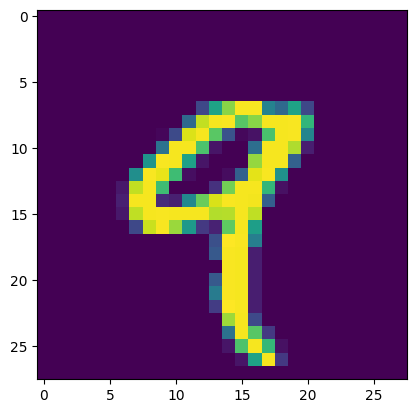

In [ ]:
img = X.iloc[4,:].values.reshape(28, 28)
plt.imshow( img )

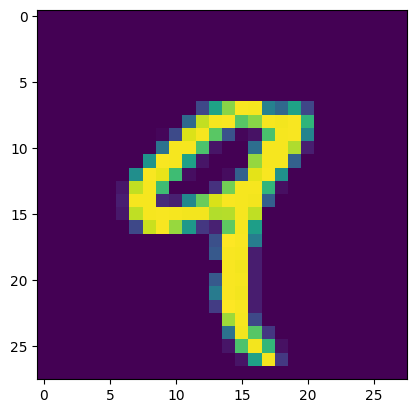

In [ ]:
img = X.iloc[4,:].values.reshape(28, 28)

pca = PCA(15)



#Applying to red channel and then applying inverse transform to transformed array.
img_transformed = pca.fit_transform(img)
img_inverted = pca.inverse_transform(img_transformed)


img_compressed =  (img_inverted).astype(np.uint8)


#viewing the compressed image
plt.imshow(img_compressed)
